<a href="https://colab.research.google.com/github/badrinarayanan02/Predictive-Analytics/blob/main/2348507_PALab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis

Actual task suggested to use stock market data. Since we are having the feasibility to work with different datasets, I had used sales data to forecast future values.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing


In [1]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.8 MB/s eta 0:00:00


In [3]:
sales_data = pd.read_csv('/content/train.csv')
sales_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
sales_data.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


Object to Datetime Conversion

In [6]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format='%d/%m/%Y')

Grouping by Month

In [7]:
monthly_sales = sales_data.groupby(pd.Grouper(key='Order Date', freq='ME'))['Sales'].sum()

In [8]:
monthly_sales.head()

,Sales
Order Date,
2015-01-31,14205.707
2015-02-28,4519.892
2015-03-31,55205.797
2015-04-30,27906.855
2015-05-31,23644.303


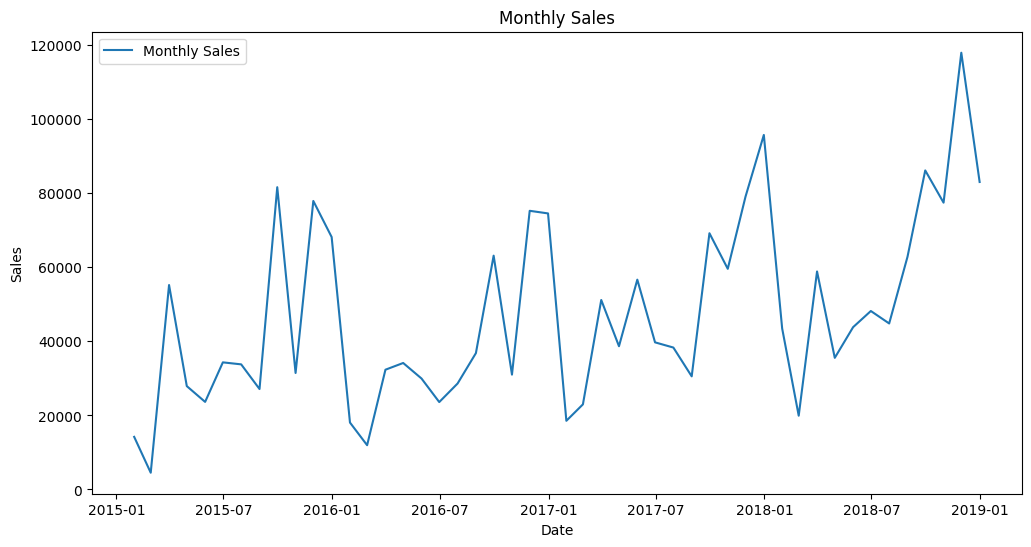

In [9]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label = 'Monthly Sales')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Inference

Sales has a fluctuation (upward and downward) over time.

Time Series Decompostion

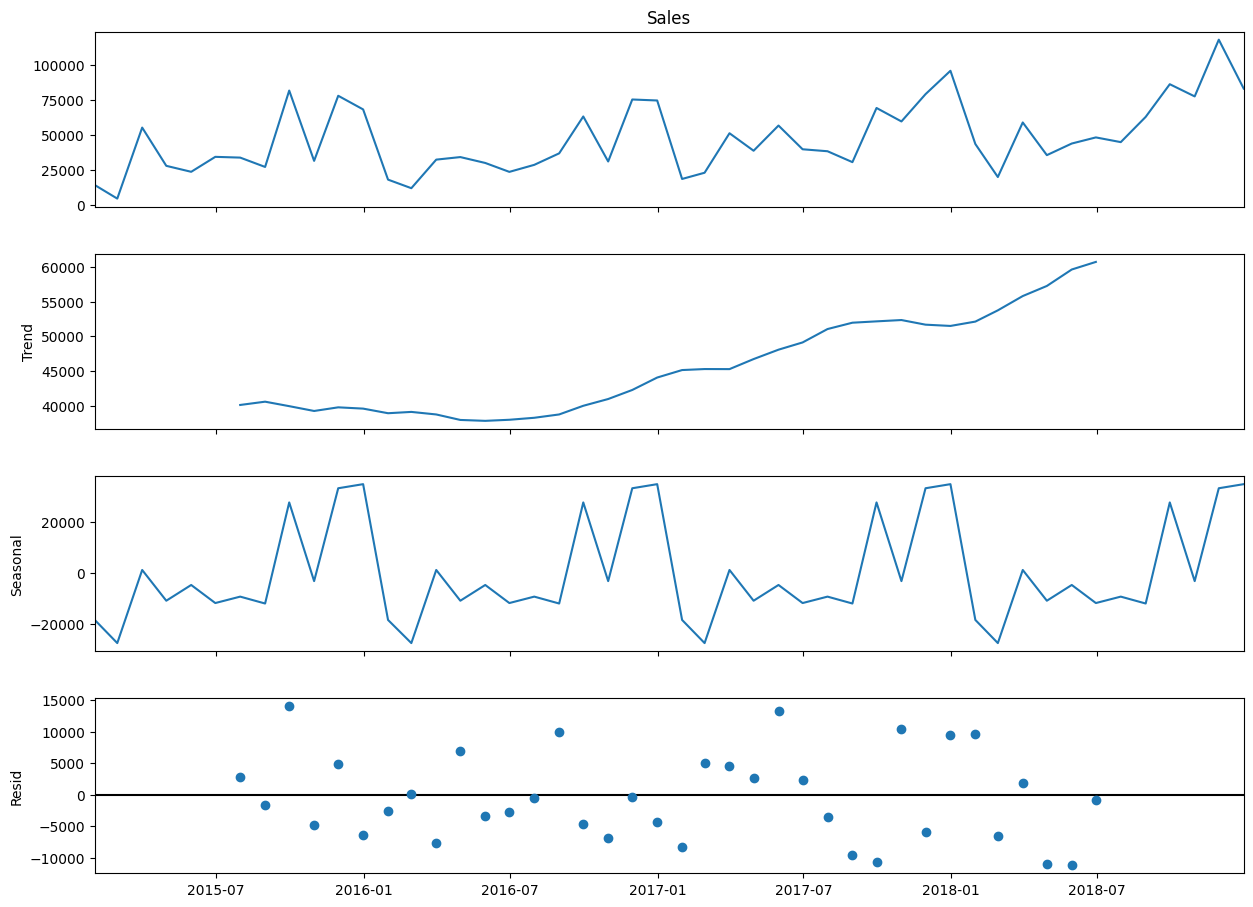

In [10]:
decomposition = seasonal_decompose(monthly_sales, model='additive')
fig = decomposition.plot()
fig.set_size_inches(14,10)
plt.show()

### Inference

Decompostion tells the underline patterns of time series data. It shows the trend, sesonal and residual. We have 4 season, in each season we will be having big day deals etc. Residual represents the random noise that remains after removing the trend. The model could'nt explain these values.

Checking Stationarity using ADF Test

In [11]:
def check_stationarity(timeseries):
  result = adfuller(timeseries)
  print('ADF Test Results:')
  print('ADF Statistics:', result[0])
  print('p-value:', result[1])
  print('Critical Value: ')
  for key, value in result[4].items():
    print(f'\t{key}:{value}')
  return result[1] < 0.05

is_stationary = check_stationarity(monthly_sales)
print(f"\nTime series is {'stationary' if is_stationary else 'non-stationary'}")

ADF Test Results:
ADF Statistics: -4.416136761430769
p-value: 0.00027791039276670623
Critical Value: 
	1%:-3.5778480370438146
	5%:-2.925338105429433
	10%:-2.6007735310095064

Time series is stationary


### Buidling Arima Model

Selecting the best parameters for arima model

In [12]:
auto_model = auto_arima(monthly_sales,
                        start_p=0, start_q=0,
                        max_p=5, max_q=5,
                        m=12,
                        seasonal=True,
                        d=None,
                        trace=True,
                        error_action='ignore',
                        supress_warnings=True,
                        stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1085.632, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1096.560, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1076.500, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1077.487, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1094.708, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1089.579, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1078.250, Time=0.14 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1078.452, Time=0.09 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1080.901, Time=0.07 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1079.864, Time=0.26 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1084.035, Time=0.06 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1073.635, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1087.151, Time=0.04 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1075.267, Time=0.19 sec
 ARIMA(2,1,0)(1,0,1

In [13]:
model = ARIMA(monthly_sales,
              order=auto_model.order,
              seasonal_order=auto_model.seasonal_order)
results = model.fit()

Forecasting

In [14]:
forecast_periods = 12
forecast = results.get_forecast(steps=forecast_periods)
mean_forecast = forecast.predicted_mean

Confidence Interval

In [15]:
conf_int_95 = forecast.conf_int(alpha=0.05)
conf_int_80 = forecast.conf_int(alpha=0.20)
conf_int_70 = forecast.conf_int(alpha=0.30)

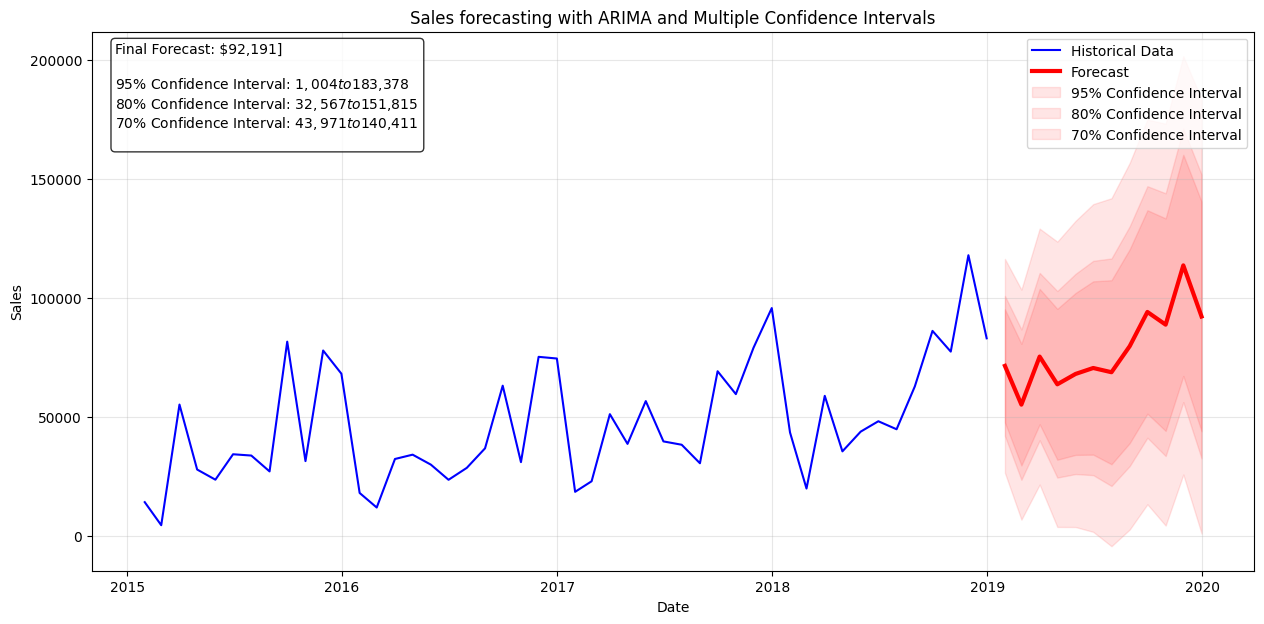

In [16]:
plt.figure(figsize=(15,7))

plt.plot(monthly_sales, label='Historical Data', color='blue')
plt.plot(mean_forecast, label='Forecast',color='red',linewidth=3)

plt.fill_between(mean_forecast.index,
                 conf_int_95.iloc[:,0],
                 conf_int_95.iloc[:,1],
                 color='red', alpha=0.1,
                 label='95% Confidence Interval')

plt.fill_between(mean_forecast.index,
                 conf_int_80.iloc[:,0],
                 conf_int_80.iloc[:,1],
                 color='red', alpha=0.1,
                 label='80% Confidence Interval')

plt.fill_between(mean_forecast.index,
                 conf_int_70.iloc[:,0],
                 conf_int_70.iloc[:,1],
                 color='red', alpha=0.1,
                 label='70% Confidence Interval')

plt.title('Sales forecasting with ARIMA and Multiple Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, alpha=0.3)

last_forecast = mean_forecast.iloc[-1]
ranges_95_lower = conf_int_95.iloc[-1,0]
ranges_95_upper = conf_int_95.iloc[-1,-1]
ranges_80_lower = conf_int_80.iloc[-1,0]
ranges_80_upper = conf_int_80.iloc[-1,1]
ranges_70_lower = conf_int_70.iloc[-1,0]
ranges_70_upper = conf_int_70.iloc[-1,1]

info = f'Final Forecast: ${last_forecast:,.0f}]\n\n' \
       f'95% Confidence Interval: ${ranges_95_lower:,.0f} to ${ranges_95_upper:,.0f}\n' \
       f'80% Confidence Interval: ${ranges_80_lower:,.0f} to ${ranges_80_upper:,.0f} \n' \
       f'70% Confidence Interval: ${ranges_70_lower:,.0f} to ${ranges_70_upper:,.0f}\n '

plt.text(0.02, 0.98, info,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()


### Inference

Got the forecasting values for the next 12 months (2019-2020). Based on the forecasted values, We can infer the sales value that we will be obtaining in the next year. Confidence Interval indicates the range within we expect the true future values to fall.

### Evaluation Metrics

In [20]:
print('\nModel Performance Metrics:')
mse = mean_squared_error(monthly_sales, results.fittedvalues)
rmse = np.sqrt(mse)
mae = mean_absolute_error(monthly_sales, results.fittedvalues)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

print("\nForecast Ranges for Final Period: ")
print(f"Point Forecast:  ${last_forecast:,.2f}")
print("\nConfidence Intervals:")
print(f"95% CI: ${ranges_95_lower:,.2f} to ${ranges_95_upper:,.2f}")
print(f"80% CI: ${ranges_80_lower:,.2f} to ${ranges_80_upper:,.2f}")
print(f"70% CI: ${ranges_70_lower:,.2f} to ${ranges_70_upper:,.2f}")


Model Performance Metrics:
Mean Squared Error: 372198461.41
Root Mean Squared Error: 19292.45
Mean Absolute Error: 14432.38

Forecast Ranges for Final Period: 
Point Forecast:  $92,191.07

Confidence Intervals:
95% CI: $1,003.72 to $183,378.42
80% CI: $32,566.87 to $151,815.28
70% CI: $43,970.99 to $140,411.15


In [18]:
print("\nInterval Widths as Percentage of forecast: ")
print(f"95% CI: {((ranges_95_upper - ranges_95_lower)/2/last_forecast*100):,.1f}%")
print(f"80% CI: {((ranges_80_upper - ranges_80_lower)/2/last_forecast*100):,.1f}%")
print(f"70% CI: {((ranges_70_upper - ranges_70_lower)/2/last_forecast*100):,.1f}%")



Interval Widths as Percentage of forecast: 
95% CI: 98.9%
80% CI: 64.7%
70% CI: 52.3%


In [19]:
forecast_df = pd.DataFrame({
    'Forecast': mean_forecast,
    '95% Lower': conf_int_95.iloc[:,0],
    '95% Upper': conf_int_95.iloc[:,1],
    '80% Lower': conf_int_80.iloc[:,0],
    '80% Upper': conf_int_80.iloc[:,1],
    '70% Lower': conf_int_70.iloc[:,0],
    '70% Upper': conf_int_70.iloc[:,1],
})

print("\n Detailed Forecast with Confidence Intervals:")
print(forecast_df)


 Detailed Forecast with Confidence Intervals:
                 Forecast     95% Lower      95% Upper     80% Lower  \
2019-01-31   71457.294751  26519.448466  116395.141036  42074.016429   
2019-02-28   55170.675698   6856.399051  103484.952345  23579.668229   
2019-03-31   75354.273330  21594.176485  129114.370174  40202.435430   
2019-04-30   63712.967935   3787.033048  123638.902823  24529.505241   
2019-05-31   68065.122556   3753.333485  132376.911627  26013.903953   
2019-06-30   70562.386142   1722.863584  139401.908699  25550.641742   
2019-07-31   68781.958294  -4308.035962  141871.952550  20990.979836   
2019-08-31   79738.550996   2724.249373  156752.852620  29381.605872   
2019-09-30   94101.274958  13300.622934  174901.926983  41268.568380   
2019-10-31   88767.503543   4360.758298  173174.248789  33576.899346   
2019-11-30  113674.495432  25814.812908  201534.177957  56226.136904   
2019-12-31   92191.072958   1003.720938  183378.424979  32566.868299   

                

### Inference

The error is very high in MSE, RMSE and MAE. Confidence Interval shows some uncertainity. The Model needs an improvement. Log Transform or differencing can be applied to improve the performance.

### Holtwinters Forecasting Model

In [25]:
models = []
specifications = [
    {
        'name':'Fixed Parameters',
        'model': ExponentialSmoothing(
            monthly_sales,
            seasonal_periods=12,
            trend='add',
            seasonal='add',
            damped_trend=True
        ).fit(
            smoothing_level=0.2,
            smoothing_trend=0.1,
            smoothing_seasonal=0.1,
            damping_trend=0.98,
            optimized=False
        )
    },
    {
        'name':'Multiplicative Seasonal',
        'model': ExponentialSmoothing(
            monthly_sales,
            seasonal_periods=12,
            trend='add',
            seasonal='mul',
            damped_trend=True
        ).fit(
            smoothing_level=0.2,
            smoothing_trend=0.1,
            smoothing_seasonal=0.1,
            damping_trend=0.98,
            optimized=False
        )
    },
    {
          'name':'Multiplicative Trend',
          'model': ExponentialSmoothing(
              monthly_sales,
              seasonal_periods=12,
              trend='mul',
              seasonal='add',
              damped_trend=True
          ).fit(
              smoothing_level=0.2,
              smoothing_trend=0.1,
              smoothing_seasonal=0.1,
              damping_trend=0.98,
              optimized=False
          )
      },
]

Holtwinters model can adapt to non stationary data with trends. It has two variants, additive and multiplicative. Additive is useful for seasonal variations that are constant over time. Multiplicative is useful for seasonal variations that are fluctuating over time. We will compare all these variants.

### Evaluations

In [26]:
results = []
for spec in specifications:
  model = spec['model']
  name = spec['name']

  rmse = np.sqrt(mean_squared_error(monthly_sales, model.fittedvalues))
  mae = mean_absolute_error(monthly_sales, model.fittedvalues)

  results.append({
      'name' : name,
      'rmse' : rmse,
      'mae' : mae,
      'model' : model
  })

In [29]:
best_model = min(results, key=lambda x: x['rmse'])
hw_model = best_model['model']
hw_forecast = hw_model.forecast(12)

### Visualization

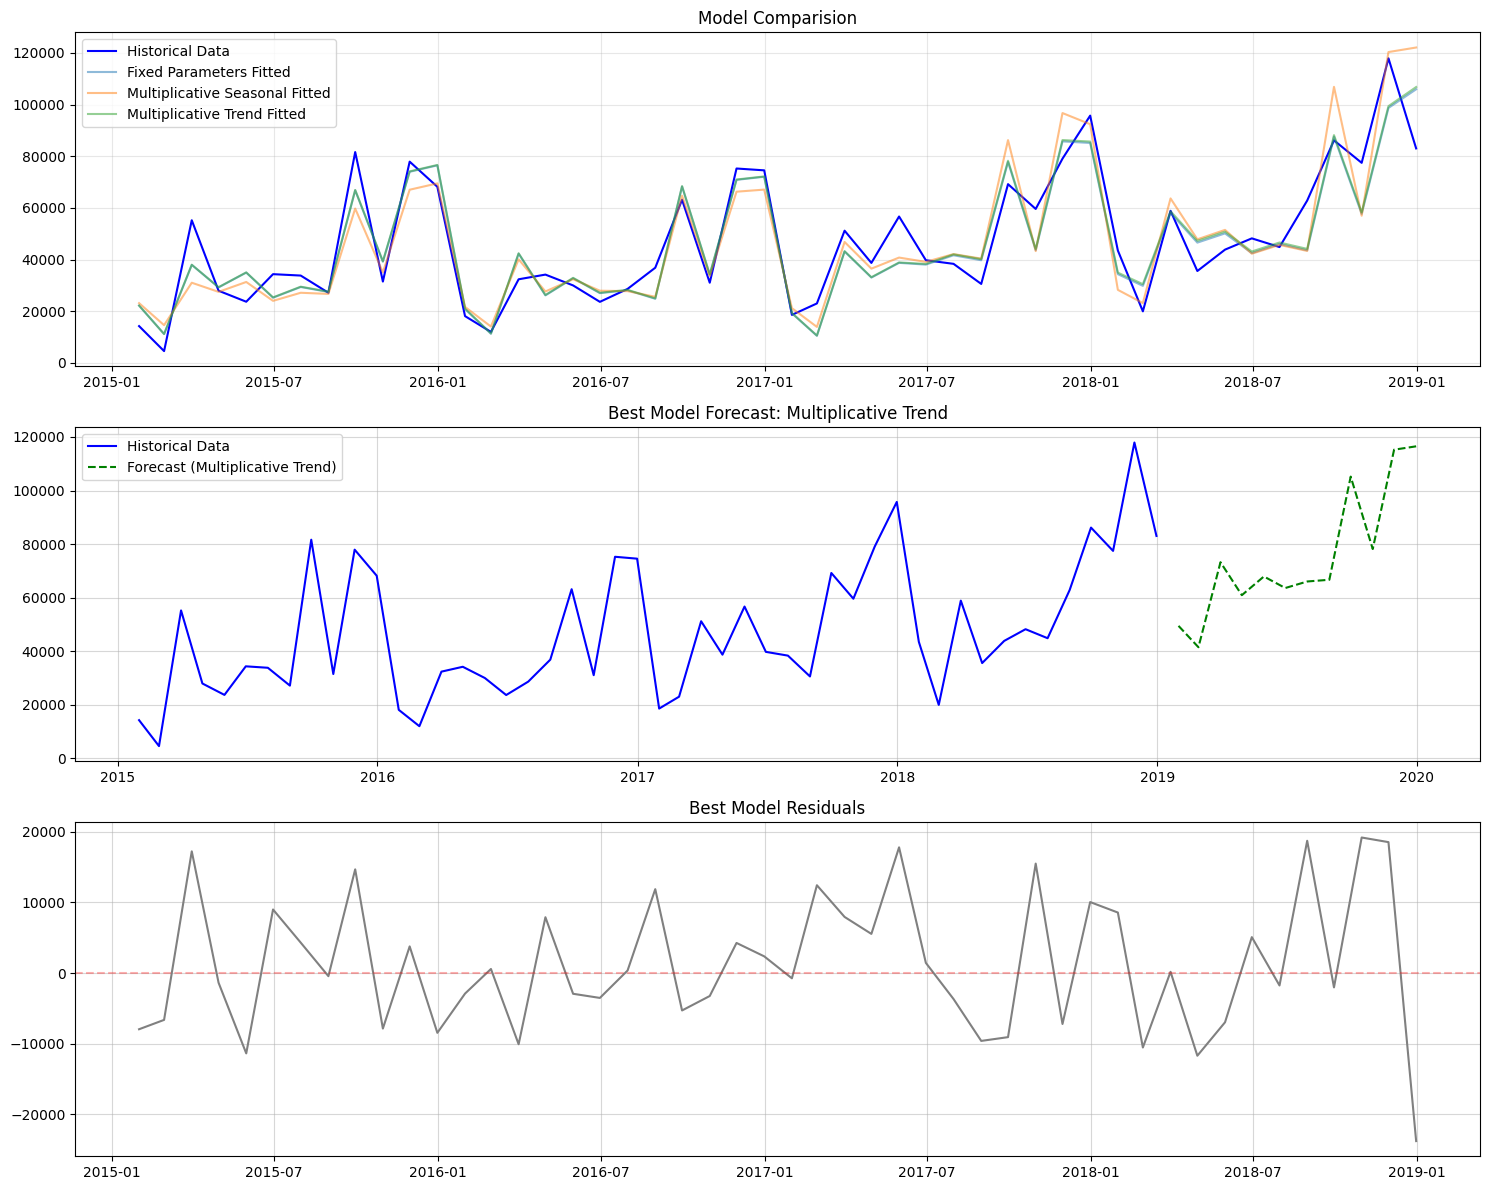

In [35]:
plt.figure(figsize=(15,12))

plt.subplot(3,1,1)
plt.plot(monthly_sales.index, monthly_sales, label='Historical Data', color='blue')
for result in results:
  plt.plot(result['model'].fittedvalues.index,
           result['model'].fittedvalues,
           label=f"{result['name']} Fitted",
           alpha=0.5)
plt.title('Model Comparision')
plt.legend()
plt.grid(True, alpha=0.3)

# Best Model Forecast

plt.subplot(3,1,2)
plt.plot(monthly_sales.index, monthly_sales, label = 'Historical Data', color = 'blue')
plt.plot(hw_forecast.index, hw_forecast,
         label=f"Forecast ({best_model['name']})",
         color='green', linestyle='--')
plt.title(f"Best Model Forecast: {best_model['name']}")
plt.legend()
plt.grid(True, alpha=0.5)

# Residuals of the best model

plt.subplot(3,1,3)
residuals=monthly_sales - hw_model.fittedvalues
plt.plot(monthly_sales.index, residuals, label='Residuals', color='gray')
plt.axhline(y=0,color='r',linestyle='--', alpha=0.3)
plt.title('Best Model Residuals')
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()


### Inference

Holtwinter model variant Multiplicative Trend is the best version here. Since the data seasonal variation is fluctuating over time, multiplicative holt winters is good.

### Model Comparison

In [37]:
print("\n Model Comparison:")
for result in results:
  print(f"\n{result['name']}:")
  print(f"RMSE: ${result['rmse']:.2f}")
  print(f"MAE: ${result['mae']:.2f}")

print("\n")
print(f"Best Model: {best_model['name']}")
print(f"Best RMSE: ${best_model['rmse']:.2f}")


 Model Comparison:

Fixed Parameters:
RMSE: $9783.60
MAE: $7831.27

Multiplicative Seasonal:
RMSE: $11758.67
MAE: $8762.04

Multiplicative Trend:
RMSE: $9762.29
MAE: $7841.90


Best Model: Multiplicative Trend
Best RMSE: $9762.29


### Inference

All the three models has performed well when compared with ARIMA model. The RMSE is very less. We improved the performance of the model.

Best Model Parameters


In [41]:
print('\nBest Model Parameters:')
print(f"Smoothing Level(a): {hw_model.params['smoothing_level']:.3f}")
print(f"Trend Smoothing(a): {hw_model.params['smoothing_trend']:.3f}")
print(f"Smoothing Level(a): {hw_model.params['smoothing_seasonal']:.3f}")
print(f"Dampling Parameter(a): {hw_model.params['damping_trend']:.3f}")


Best Model Parameters:
Smoothing Level(a): 0.200
Trend Smoothing(a): 0.100
Smoothing Level(a): 0.100
Dampling Parameter(a): 0.980


In [42]:
hw_forecast

,0
2019-01-31,49435.711479
2019-02-28,41459.506838
2019-03-31,73220.555712
2019-04-30,60904.078997
2019-05-31,67886.536597
2019-06-30,63574.157506
2019-07-31,66020.931715
2019-08-31,66663.177848
2019-09-30,105201.488326
2019-10-31,78140.769889


In [44]:
final_results = pd.DataFrame({
    'Actual': monthly_sales,
    'Fitted' : hw_model.fittedvalues,
    'Residuals' : residuals
})

In [45]:
print(final_results)

                 Actual         Fitted     Residuals
Order Date                                          
2015-01-31   14205.7070   22155.386037  -7949.679037
2015-02-28    4519.8920   11146.811114  -6626.919114
2015-03-31   55205.7970   37975.018760  17230.778240
2015-04-30   27906.8550   29267.192066  -1360.337066
2015-05-31   23644.3030   35011.240872 -11366.937872
2015-06-30   34322.9356   25323.862069   8999.073531
2015-07-31   33781.5430   29471.746667   4309.796333
2015-08-31   27117.5365   27556.862748   -439.326248
2015-09-30   81623.5268   66942.870651  14680.656149
2015-10-31   31453.3930   39306.677895  -7853.284895
2015-11-30   77907.6607   74133.215819   3774.444881
2015-12-31   68167.0585   76624.430323  -8457.371823
2016-01-31   18066.9576   20970.723747  -2903.766147
2016-02-29   11951.4110   11372.983261    578.427739
2016-03-31   32339.3184   42412.453053 -10073.134653
2016-04-30   34154.4685   26249.677779   7904.790721
2016-05-31   29959.5305   32890.486634  -2930.

# Conclusion

Holtwinters multiplicative variant model is performing well with less RMSE indicates that the predicted values are not having that much erros when comparing to the actual values. XG Boost is good for time series analysis as well.